In [1]:
#Mediante https://www.tensorflow.org/tutorials/keras/regression
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential, Model
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Using TensorFlow backend.


In [2]:
#Recuperación del Dataset generado anteriormente
dataMeteoCellId = pd.read_csv('tres_semanas_mi_tweet_meteo.csv', index_col=0)
dataMeteoCellId = dataMeteoCellId.iloc[:,4:15]
dataMeteoCellId.describe()

,hour,idx,internet,smsin,smsout,week,weekday,tweet,relativeHumidity,precipitation,temperature
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,11.500000,8315.500000,1883.184312,146.427246,69.256627,49.000000,3.000000,0.156085,60.146495,0.025066,5.464153
std,6.923331,145.516044,990.053311,134.946435,62.076475,0.816632,2.000331,0.748209,33.144768,0.268528,4.398353
min,0.000000,8064.000000,261.785621,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,-29.900000
25%,5.750000,8189.750000,1218.694935,23.220361,25.589508,48.000000,1.000000,0.000000,40.000000,0.000000,2.900000
50%,11.500000,8315.500000,1658.813447,113.045781,56.829623,49.000000,3.000000,0.000000,70.000000,0.000000,5.700000
75%,17.250000,8441.250000,2481.586954,235.320039,101.127651,50.000000,5.000000,0.000000,88.000000,0.000000,8.700000
max,23.000000,8567.000000,9162.618461,795.333182,424.175655,50.000000,6.000000,17.000000,100.000000,8.000000,14.500000


In [3]:
dataMeteoCellId.drop(['idx','smsin', 'smsout', 'week', 'tweet'],axis=1,inplace=True)
dataMeteoCellId

,hour,internet,weekday,relativeHumidity,precipitation,temperature
3456,0,1401.022757,0,79.0,0.0,11.0
3457,0,2016.712148,0,81.0,0.0,10.7
3458,0,1245.468163,0,88.0,0.0,9.3
3459,0,2703.537850,0,90.0,0.0,9.2
3460,0,858.288439,0,0.0,0.0,8.7
...,...,...,...,...,...,...
6475,23,2271.731795,6,100.0,0.0,3.8
6476,23,1713.374630,6,95.0,0.0,2.4
6477,23,2713.216708,6,93.0,0.0,2.8
6478,23,999.341485,6,0.0,0.0,2.8


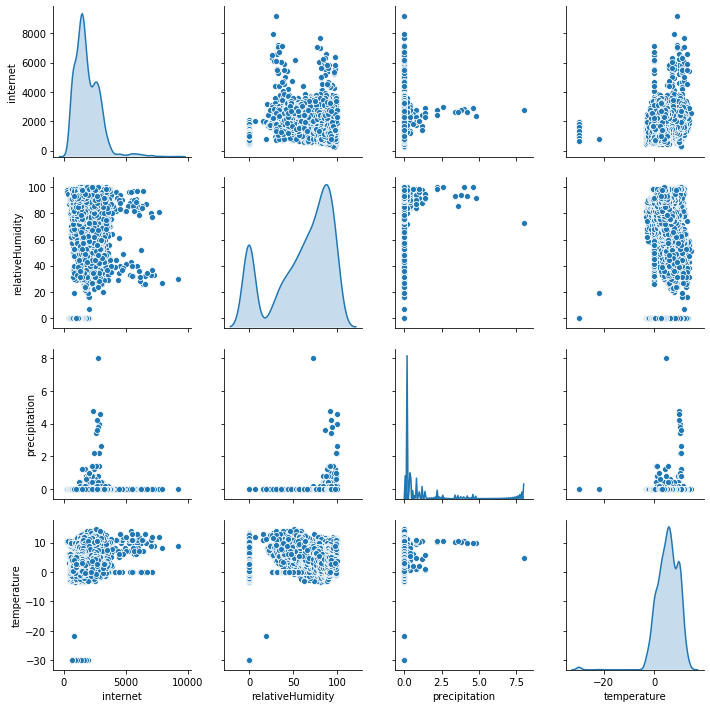

In [4]:
sns.pairplot(dataMeteoCellId[["internet", "relativeHumidity", "precipitation", "temperature"]], diag_kind="kde")

In [5]:
y = dataMeteoCellId.iloc[:,1]
dataMeteoCellId.drop(['internet'],axis=1,inplace=True)
X = dataMeteoCellId

In [6]:
X

,hour,weekday,relativeHumidity,precipitation,temperature
3456,0,0,79.0,0.0,11.0
3457,0,0,81.0,0.0,10.7
3458,0,0,88.0,0.0,9.3
3459,0,0,90.0,0.0,9.2
3460,0,0,0.0,0.0,8.7
...,...,...,...,...,...
6475,23,6,100.0,0.0,3.8
6476,23,6,95.0,0.0,2.4
6477,23,6,93.0,0.0,2.8
6478,23,6,0.0,0.0,2.8


In [7]:
y

3456    1401.022757
3457    2016.712148
3458    1245.468163
3459    2703.537850
3460     858.288439
           ...     
6475    2271.731795
6476    1713.374630
6477    2713.216708
6478     999.341485
6479    1432.508885
Name: internet, Length: 3024, dtype: float64

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=10)

In [9]:
Xtrain_stats = Xtrain.describe()
Xtrain_stats = Xtrain_stats.transpose()
Xtrain_stats

,count,mean,std,min,25%,50%,75%,max
hour,2116.0,11.689036,6.913289,0.0,6.0,12.0,18.0,23.0
weekday,2116.0,3.020794,1.994447,0.0,1.0,3.0,5.0,6.0
relativeHumidity,2116.0,60.233932,33.144666,0.0,41.0,70.0,88.0,100.0
precipitation,2116.0,0.025142,0.280848,0.0,0.0,0.0,0.0,8.0
temperature,2116.0,5.436626,4.369369,-29.9,2.8,5.7,8.5,14.5


In [10]:
def norm(x):
  return (x - Xtrain_stats['mean']) / Xtrain_stats['std']
normed_Xtrain = norm(Xtrain)
normed_Xtest = norm(Xtest)

In [11]:
#Convert DataFrame to NumPy array
X_train=Xtrain.values
X_test=Xtest.values
y_train=ytrain.values
y_test=ytest.values
normed_X_train = normed_Xtrain
normed_X_test = normed_Xtest

In [12]:
model = Sequential()
model.add(Dense(64, input_dim = 5, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation='linear'))

In [13]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy','mae', 'mse'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [20]:
history1024 = model.fit(normed_X_train, y_train, epochs=1000, validation_split = 0.2, batch_size=1024, validation_data=(normed_X_test, y_test), verbose = 0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.0000,  loss:669516.7227,  mae:577.4801,  mse:669516.6875,  val_accuracy:0.0000,  val_loss:835458.1875,  val_mae:641.2741,  val_mse:835458.1875,  
....................................................................................................
Epoch: 100, accuracy:0.0000,  loss:661054.8825,  mae:573.6644,  mse:661054.8750,  val_accuracy:0.0000,  val_loss:825039.6250,  val_mae:637.2574,  val_mse:825039.6250,  
....................................................................................................
Epoch: 200, accuracy:0.0000,  loss:650963.5346,  mae:567.8557,  mse:650963.5625,  val_accuracy:0.0000,  val_loss:813365.3125,  val_mae:631.6104,  val_mse:813365.3125,  
....................................................................................................
Epoch: 300, accuracy:0.0000,  loss:638271.2944,  mae:562.0703,  mse:638271.3125,  val_accuracy:0.0000,  val_loss:798993.1250,  val_mae:623.0075,  val_mse:798993.1250,  
......................

In [21]:
hist = pd.DataFrame(history1024.history)
hist['epoch'] = history1024.epoch
hist.tail()

,val_loss,val_accuracy,val_mae,val_mse,loss,accuracy,mae,mse,epoch
995,664745.1875,0.0,558.779053,664745.1875,542041.649279,0.0,514.903931,542041.6250,995
996,667536.1250,0.0,557.719116,667536.1250,542123.066694,0.0,514.572205,542123.0000,996
997,662724.6250,0.0,559.904663,662724.6250,542303.066635,0.0,512.467834,542303.0625,997
998,662493.0000,0.0,560.300598,662493.0000,541681.160681,0.0,515.549927,541681.1250,998
999,664506.3750,0.0,559.364685,664506.3750,541614.575142,0.0,516.137817,541614.5625,999


In [22]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Internet]')

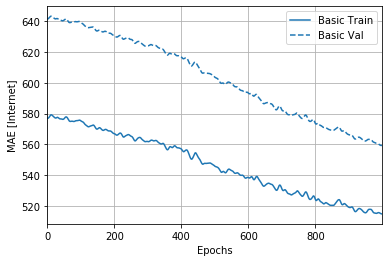

In [23]:
plotter.plot({'Basic': history1024}, metric = "mae")
plt.ylabel('MAE [Internet]')

Text(0, 0.5, 'MSE [Internet^2]')

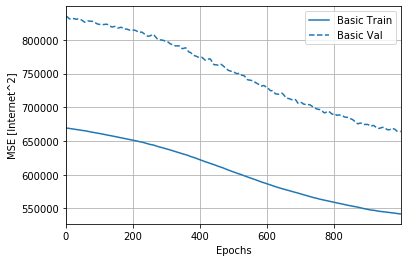

In [24]:
plotter.plot({'Basic': history1024}, metric = "mse")
plt.ylabel('MSE [Internet^2]')

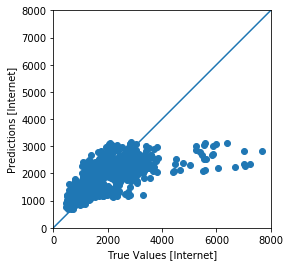

In [28]:
test_predictions = model.predict(normed_X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
lims = [0, 8000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

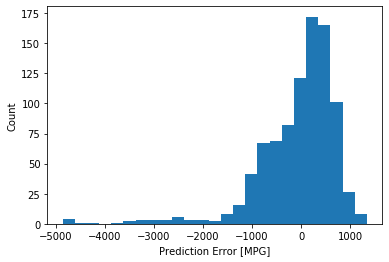

In [29]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")